# MO01 - The illumination problem

Source: https://see.stanford.edu/Course/EE364A
([hw3extra.pdf](https://see.stanford.edu/materials/lsocoee364a/hw3extra.pdf) task 3).

A [physical law from photometry](https://en.wikipedia.org/wiki/Photometry_(optics)) states

$$
I = \frac{p}{r^{2}}\cos(\Theta),
$$

the **illuminance** on a screen
$I$ (SI unit: lux $[lx = \frac{lm}{m^{2}}]$)
depends on:
1. the **luminous intensity $p$** (SI unit: candela $[cd = \frac{lm}{sr}]$)
   of the lamps,
2. the distance to the respective screen $r$ (SI unit: meter $[m]$),
3. the angle $\Theta$ to between the lamp and screen.

![Lamp patch illustration](res/MO01_lamp.png)

In case of the given problem data,
there are $m = 10$ lamps $L_{j}$, $j = 1, \ldots, m$,
with assigned **luminous intensities** $p_{j}$
and $n = 20$ screens with respective **illumination values**
$I_{k}$, $k = 1, \ldots, n$.

In the following the SI units are neglected.
The following linear dependencies between $I_{k}$ and $p_{j}$ hold:

$$
I_{k} = \underbrace{\dfrac{1}{r_{kj}^{2}} \max(\cos(\Theta_{kj}), 0)}_{a_{kj}} \; p_{j}
$$

with $r_{kj} = \lVert dVI \rVert$ and

$$
\cos(\Theta_{kj}) = \dfrac{(dVI)^{T} (dVperp)}{\lVert dVI\rVert\cdot\lVert dVperp\rVert}
$$

To regard all lamps $p_{j}$,
the **luminous intensities** have to be summed up:

$$
I_{k} = \sum_{j = 1}^{m} a_{kj} p_{j}.
$$

Regarding all $n = 20$ screens,
the following overdetermined linear system of equation
$I = A \cdot p$ follows:

$$
\begin{pmatrix} I_{1} \\ \\ \\ \vdots \\ \\ \\ I_{n} \end{pmatrix}
= \begin{pmatrix} a_{1,1} & \cdots & a_{1,m} \\  \\  \\ \vdots & \ddots & \vdots \\  \\ \\  a_{n,1} & \cdots & a_{n,m} \end{pmatrix} \begin{pmatrix} p_{1} \\ \vdots \\ p_{m} \end{pmatrix}.
$$

As ultimate goal,
all screens illuminations $I_{k}$
should be as close as possible to the **desired illumination** $I_{des}$.

Finally,
the following constrained non-linear optimization problem can be formulated:

$$
\begin{array}{ll}
\textrm{minimize}   & \displaystyle\max_{k = 1, \ldots, n} |\log{(I_{k})} - \log{(I_{des})}|    \\
\textrm{subject to} & 0 \leq p_{j} \leq p_{max} \quad j = 1, \ldots, m.
\end{array}
$$

The objective function formulates a quality measure $f_{optimal}(p)$
depending on the **luminous intensity** of the lamps $p_{j}$,
that minimizes the maximal logarithmic distance
between the **actual** screen **illumination** $I_{k} = A_{(k,:)}p$
and the **desired** screen **illumination** $I_{des}$.

$$
\begin{aligned}
f_{optimal}(p, I_{des})
:=& \max_{k = 1, \ldots, n} \lvert \log{(I_{k})}      - \log{(I_{des})} \rvert \\
 =& \max_{k = 1, \ldots, n} \lvert \log{(A_{(k,:)}p)} - \log{(I_{des})} \rvert
\end{aligned}
$$

Last but not least,
the constraints might seem trivial,
but are for a practical application of importance:
the **luminous intensity** of a lamp $p_{j}$
has the physical constraints that it cannot "shine negative"
and it cannot "shine brighter than possible",
$0 \leq p_{j} \leq p_{\max}$.

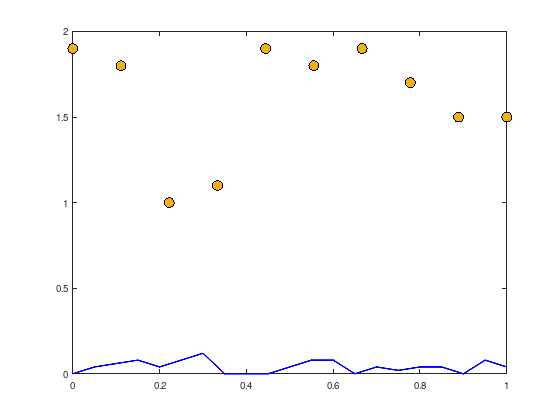

In [12]:
L = [linspace(0,1,10);
     1.9, 1.8, 1.0, 1.1, 1.9, 1.8, 1.9, 1.7, 1.5, 1.5];

m = size (L, 2); % number of lamps

% begin and endpoints of patches
V = [linspace(0,1,21);
     .4*[0.0, 0.1, 0.15, 0.2, 0.1, 0.2, 0.3, 0.0, 0.0, 0.0 , ...
         0.1, 0.2, 0.2, 0.0, 0.1, 0.05, 0.1, 0.1, 0.0, 0.2, 0.1]];
n = size (V, 2) - 1; % number of patches

plot (L(1,:), L(2,:), 'ko', 'MarkerSize', 10, ...
      'MarkerFaceColor', [0.9290 0.6940 0.1250]);
hold on;
plot (V(1,:), V(2,:), 'b-', 'LineWidth', 2);

% construct A
warning('off', 'Octave:colon-nonscalar-argument');
dV = V(:,2:n+1) - V(:,1:n); % tangent to patches
VI = V(:,1:n) +.5*dV;       % midpoint of patches
A = zeros (n, m);
for i = 1:n
  for j = 1:m
    dVI = L(:,j) - VI(:,i);
    dVperp = null (dV(:,i)'); % upward pointing normal
    if (dVperp(2) < 0)
      dVperp = -dVperp;
    end
    A(i,j) = max (0, dVI'*dVperp/...
      (norm(dVI)*norm(dVperp)))./norm(dVI)^2;
  end
end

Read task 3 from
[hw3extra.pdf](https://see.stanford.edu/materials/lsocoee364a/hw3extra.pdf)
and try to find an optimal solution with

1. Uniform $p_{j}$
2. Least-sqares
3. Linear Programming
4. Convex Programming (https://yalmip.github.io/ or 
   http://cvxr.com/cvx/).

[Solution hints](https://see.stanford.edu/materials/lsocoee364a/hw3sol.pdf).